In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance_matrix 
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 

In [12]:
##membac file csv didalam direktori dan menampilkan headnya
data = pd.read_csv("D:\Kuliah\SMSTR 5\Pembelajaran_Mesin\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
#menghapus kolom sex
data = data.drop(["sex"], axis = 1)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,1


In [29]:
#menampilkan kolom yang dipilih
data_x = data[["age", "serum_sodium"]]
data_x.head()

,age,serum_sodium
0,75.0,130
1,55.0,136
2,65.0,129
3,50.0,137
4,65.0,116


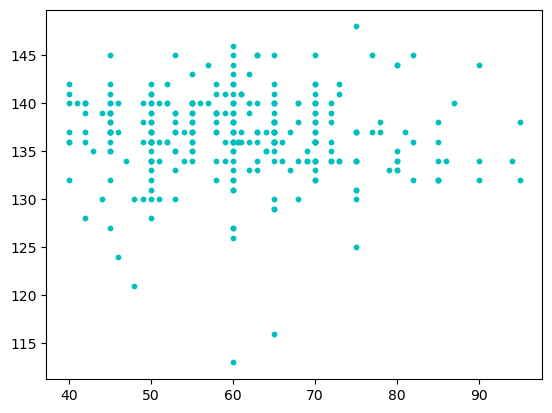

In [31]:
plt.scatter(data.age, data.serum_sodium, s =10, c = "c", marker = "o", alpha = 1)
plt.show()

In [32]:
x_array =  np.array(data_x)
print(x_array)

[[ 75.    130.   ]
 [ 55.    136.   ]
 [ 65.    129.   ]
 [ 50.    137.   ]
 [ 65.    116.   ]
 [ 90.    132.   ]
 [ 75.    137.   ]
 [ 60.    131.   ]
 [ 65.    138.   ]
 [ 80.    133.   ]
 [ 75.    131.   ]
 [ 62.    140.   ]
 [ 45.    137.   ]
 [ 50.    137.   ]
 [ 49.    138.   ]
 [ 82.    136.   ]
 [ 87.    140.   ]
 [ 45.    127.   ]
 [ 70.    140.   ]
 [ 48.    121.   ]
 [ 65.    137.   ]
 [ 65.    136.   ]
 [ 68.    140.   ]
 [ 53.    135.   ]
 [ 75.    134.   ]
 [ 80.    144.   ]
 [ 95.    138.   ]
 [ 70.    136.   ]
 [ 58.    134.   ]
 [ 82.    132.   ]
 [ 94.    134.   ]
 [ 85.    132.   ]
 [ 50.    128.   ]
 [ 50.    138.   ]
 [ 65.    140.   ]
 [ 69.    134.   ]
 [ 90.    134.   ]
 [ 82.    145.   ]
 [ 60.    137.   ]
 [ 60.    142.   ]
 [ 70.    134.   ]
 [ 50.    136.   ]
 [ 70.    139.   ]
 [ 72.    134.   ]
 [ 60.    142.   ]
 [ 50.    135.   ]
 [ 51.    130.   ]
 [ 60.    138.   ]
 [ 80.    133.   ]
 [ 57.    140.   ]
 [ 68.    138.   ]
 [ 53.    139.   ]
 [ 60.    14

In [33]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)
x_scaled

array([[0.63636364, 0.48571429],
       [0.27272727, 0.65714286],
       [0.45454545, 0.45714286],
       [0.18181818, 0.68571429],
       [0.45454545, 0.08571429],
       [0.90909091, 0.54285714],
       [0.63636364, 0.68571429],
       [0.36363636, 0.51428571],
       [0.45454545, 0.71428571],
       [0.72727273, 0.57142857],
       [0.63636364, 0.51428571],
       [0.4       , 0.77142857],
       [0.09090909, 0.68571429],
       [0.18181818, 0.68571429],
       [0.16363636, 0.71428571],
       [0.76363636, 0.65714286],
       [0.85454545, 0.77142857],
       [0.09090909, 0.4       ],
       [0.54545455, 0.77142857],
       [0.14545455, 0.22857143],
       [0.45454545, 0.68571429],
       [0.45454545, 0.65714286],
       [0.50909091, 0.77142857],
       [0.23636364, 0.62857143],
       [0.63636364, 0.6       ],
       [0.72727273, 0.88571429],
       [1.        , 0.71428571],
       [0.54545455, 0.65714286],
       [0.32727273, 0.6       ],
       [0.76363636, 0.54285714],
       [0.

In [34]:
# Menentukan dan mengkonfigurasi fungsi kmeans ---
kmeans = KMeans(n_clusters = 3, random_state=123)
# Menentukan kluster dari data ---
kmeans.fit(x_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=123)

In [35]:
print(kmeans.cluster_centers_)

[[0.74848485 0.64013605]
 [0.16106195 0.67661188]
 [0.4418351  0.68392857]]


In [36]:
#Menampilkan Hasil Kluster ---
print(kmeans.labels_)
#Menambahkan Kolom "kluster" Dalam Data Frame Driver ---
driver["kluster"] = kmeans.labels_

[0 1 2 1 2 0 0 2 2 0 0 2 1 1 1 0 0 1 2 1 2 2 2 1 0 0 0 2 2 0 0 0 1 1 2 2 0
 0 2 2 2 1 2 2 2 1 1 2 0 2 2 1 2 2 2 0 2 2 1 2 1 1 1 1 1 2 1 2 2 2 1 2 0 2
 2 2 2 1 0 1 2 2 2 0 2 1 1 2 1 2 2 2 1 2 2 2 2 2 2 2 2 0 0 1 2 2 1 1 2 1 0
 1 1 2 2 2 2 0 2 0 2 2 2 2 2 1 1 2 2 1 1 2 1 2 0 0 2 2 2 1 0 1 1 2 2 1 1 2
 0 2 2 2 1 1 2 2 1 1 0 2 2 1 2 1 1 0 1 2 2 2 1 1 2 1 2 2 2 1 2 1 1 2 2 0 2
 2 1 2 2 1 0 2 1 2 1 0 1 2 1 2 2 1 2 2 0 1 1 0 2 1 2 1 0 1 2 0 2 1 2 1 0 2
 1 1 2 0 2 1 2 2 2 2 1 1 1 0 2 2 2 1 2 2 1 2 1 2 1 2 1 1 1 1 1 2 1 1 2 2 1
 1 1 2 2 2 2 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 2 2 1 2 1 1 2 1 2 0 1 2 1 2 2 1
 1 1 1]


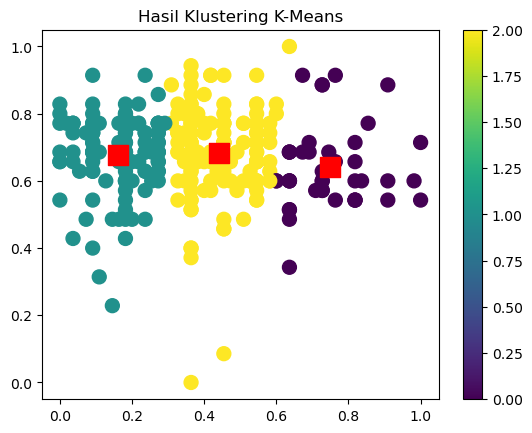

In [40]:
# Menambahkan kolom 'kluster' ke DataFrame 'data' dengan label kluster
data['kluster'] = kmeans.labels_

# Memvisualkan hasil kluster
output = plt.scatter(x_scaled[:, 0], x_scaled[:, 1], s=100, c=data['kluster'], marker="o", alpha=1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=1, marker="s")
plt.title("Hasil Klustering K-Means")
plt.colorbar(output)
plt.show()


In [46]:
##### Hierarchical Clustering


In [5]:
dataset= pd.read_csv("D:\Kuliah\SMSTR 5\Pembelajaran_Mesin\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv")
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#Standarisasi age serum_sodium dan death
dataset[['age', 'serum_sodium', 'DEATH_EVENT']] = (dataset[['age', 'serum_sodium', 'DEATH_EVENT']] - dataset[['age','serum_sodium', 'DEATH_EVENT']].mean()) / dataset[['age', 'serum_sodium', 'DEATH_EVENT']].std()

#meampilkan setelah satandarisasi
print(dataset[['age', 'serum_sodium', 'DEATH_EVENT']])

          age  serum_sodium  DEATH_EVENT
0    1.190949     -1.501519     1.451727
1   -0.490457     -0.141739     1.451727
2    0.350246     -1.728149     1.451727
3   -0.910808      0.084892     1.451727
4    0.350246     -4.674340     1.451727
..        ...           ...          ...
294  0.098035      1.444672    -0.686531
295 -0.490457      0.538152    -0.686531
296 -1.331160      0.311522    -0.686531
297 -1.331160      0.764782    -0.686531
298 -0.910808     -0.141739    -0.686531

[299 rows x 3 columns]


In [9]:
pil_colom = ['age','serum_sodium', 'DEATH_EVENT']
X = dataset[pil_colom]

##hitugn jarakEucliden matrix
D = euclidean_distances(X, X)

D_dataset=pd.DataFrame(D, index=dataset.index, columns=dataset.index)

print(D_dataset.iloc[:5, :5])

          0         1         2         3         4
0  0.000000  2.162436  0.870714  2.633264  3.282312
1  2.162436  0.000000  1.795405  0.477553  4.609908
2  0.870714  1.795405  0.000000  2.208478  2.946191
3  2.633264  0.477553  2.208478  0.000000  4.923468
4  3.282312  4.609908  2.946191  4.923468  0.000000


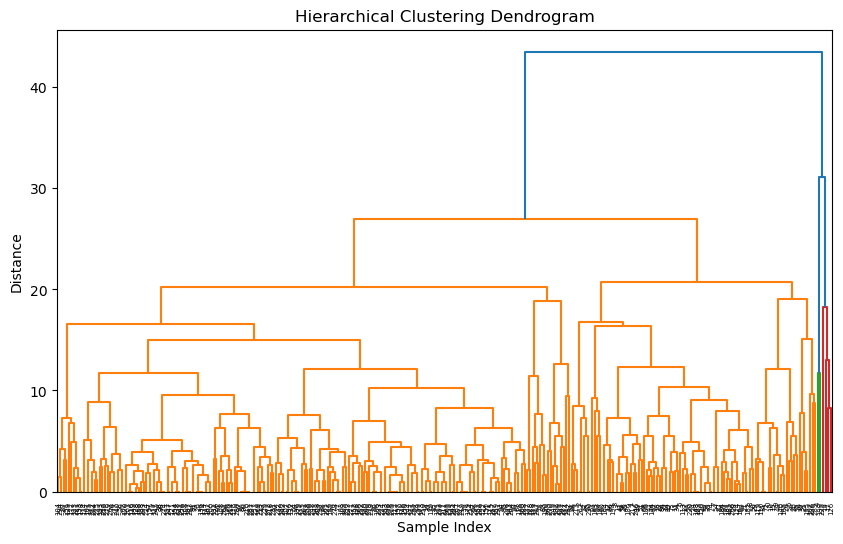

In [10]:
#model hierarchical clustering dengan metode average
fit = sch.linkage(D_dataset, method='average')
# Menampilkan dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(fit)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

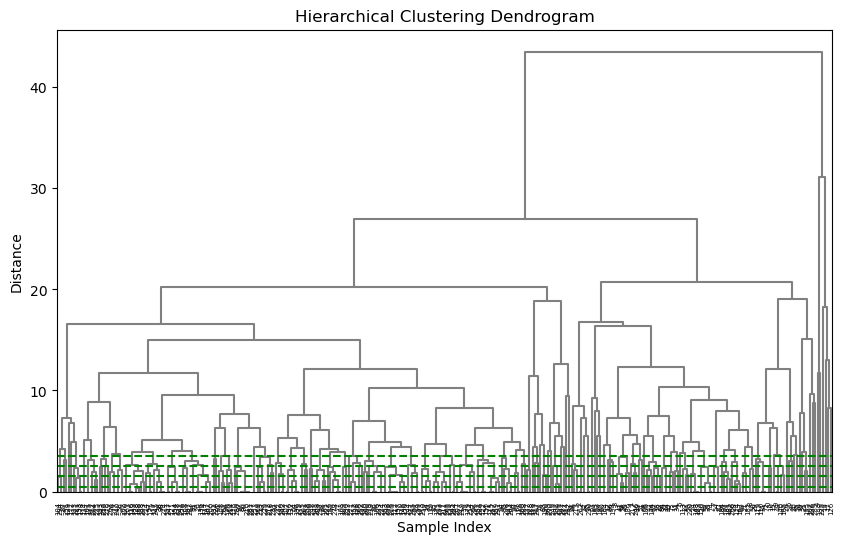

In [11]:
#model hierarchical clustering dengan metode average
fit = sch.linkage(D_dataset, method='average')

# Memotong pohon hierarki menjadi 4 klaster
k = 4
clusters = sch.cut_tree(fit, n_clusters=[k])

# Menampilkan dendrogram
plt.figure(figsize=(10, 6))
sch.dendrogram(fit, color_threshold=0, above_threshold_color='gray')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Menandai batas klaster 
for i in range(1, k+1):
    plt.axhline(y=i-0.5, color='green', linestyle='--')

plt.show()

In [12]:
#dapat menambhakan nomro clusterke data frame
dataset['Cluster'] = clusters
print(dataset)


          age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    1.190949        0                       582         0                 20   
1   -0.490457        0                      7861         0                 38   
2    0.350246        0                       146         0                 20   
3   -0.910808        1                       111         0                 20   
4    0.350246        1                       160         1                 20   
..        ...      ...                       ...       ...                ...   
294  0.098035        0                        61         1                 38   
295 -0.490457        0                      1820         0                 38   
296 -1.331160        0                      2060         1                 60   
297 -1.331160        0                      2413         0                 38   
298 -0.910808        0                       196         0                 45   

     high_blood_pressure  p

In [ ]:
#Density-based spatial clustering

In [15]:
dataset= pd.read_csv("D:\Kuliah\SMSTR 5\Pembelajaran_Mesin\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv")

In [16]:
#  kolom 'age' dan 'serum_sodium'
selected_columns = ['age', 'serum_sodium']
X = dataset[selected_columns]




In [17]:
# Standardisasi data jika diperlukan
X = StandardScaler().fit_transform(X)

# Fit DBSCAN ke data
db = DBSCAN(eps=0.3, min_samples=10).fit(X)

# Mendapatkan label klaster untuk setiap data point
labels = db.labels_



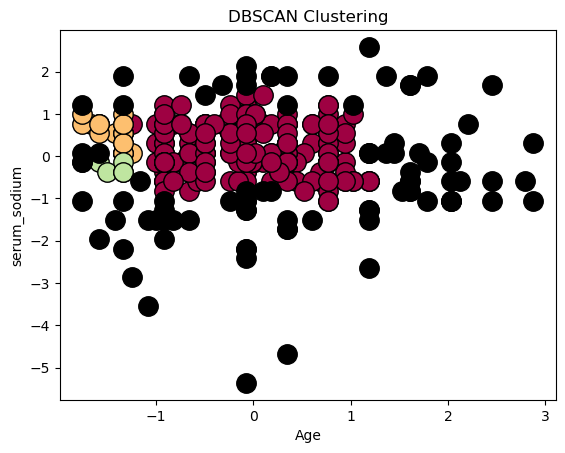

In [18]:
# Menampilkan hasil clustering
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

# Plot hasil clustering (sesuaikan plot sesuai dengan fitur yang Anda pilih)
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

plt.title('DBSCAN Clustering')
plt.xlabel('Age')
plt.ylabel('serum_sodium')
plt.show()